# EDA

### Why do EDA

- Model building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- feature engineering
- detecting outliers

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
import pandas as pd

customers = pd.read_csv(r"D:\6th sem\Projects\Zeotap\Datasets\Customers.csv")
products = pd.read_csv(r"D:\6th sem\Projects\Zeotap\Datasets\Products.csv")
transactions = pd.read_csv(r"D:\6th sem\Projects\Zeotap\Datasets\Transactions.csv")

In [49]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [50]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [51]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


<Axes: >

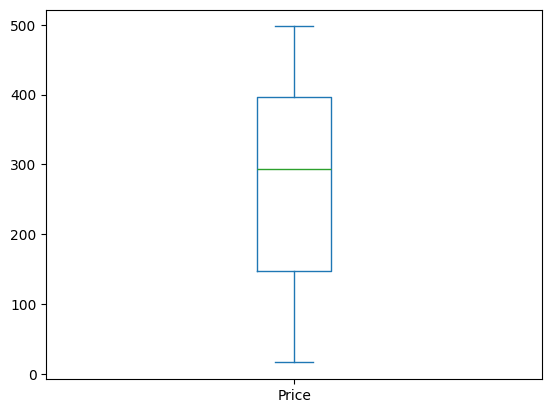

In [88]:
products['Price'].plot(kind = 'box')

In [120]:
transactions['Price'].describe()

count    1000.00000
mean      272.55407
std       140.73639
min        16.08000
25%       147.95000
50%       299.93000
75%       404.40000
max       497.76000
Name: Price, dtype: float64

###A skewness value of -0.21 is not very severe and likely won't cause significant issues in most machine learning models.

In [85]:
products['Price'].skew()

-0.2076196737826489

In [125]:
products['Category'].unique()

array(['Books', 'Electronics', 'Home Decor', 'Clothing'], dtype=object)

### Numerical
- Quantity, TotalValue, Price

### Categorical
- CustomerID, CustomerName, Region, ProductID, ProductName, Category, TransactionID, TransactionDate, SignupDate

In [126]:
# Check the shape of the datasets
print(customers.shape)
print(products.shape)
print(transactions.shape)

(200, 7)
(100, 4)
(1000, 7)


In [127]:
# Check the data types of columns
print(customers.dtypes)
print(products.dtypes)
print(transactions.dtypes)

CustomerID                 object
CustomerName               object
Region                     object
SignupDate         datetime64[ns]
SignupYearMonth         period[M]
SignupAge                   int64
SignupMonth                 int32
dtype: object
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


In [128]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID         0
CustomerName       0
Region             0
SignupDate         0
SignupYearMonth    0
SignupAge          0
SignupMonth        0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [129]:
# Convert SignupDate and TransactionDate to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Verify the conversion
print(customers.dtypes)
print(transactions.dtypes)

CustomerID                 object
CustomerName               object
Region                     object
SignupDate         datetime64[ns]
SignupYearMonth         period[M]
SignupAge                   int64
SignupMonth                 int32
dtype: object
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


In [130]:
# Summary statistics for numerical columns
print(customers.describe())
print(products.describe())
print(transactions.describe())

                SignupDate    SignupAge  SignupMonth
count                  200   200.000000   200.000000
mean   2023-07-19 08:31:12   557.645000     6.225000
min    2022-01-22 00:00:00    30.000000     1.000000
25%    2022-09-26 12:00:00   289.500000     3.000000
50%    2023-08-31 12:00:00   514.500000     6.000000
75%    2024-04-12 12:00:00   853.500000     9.000000
max    2024-12-28 00:00:00  1101.000000    12.000000
std                    NaN   325.526568     3.486424
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.29500

In [131]:
# Merge transactions with customers on 'CustomerID' to include customer details in the transactions
df = transactions.merge(customers[['CustomerID', 'CustomerName', 'Region']], on='CustomerID', how='left')

# Merge the above result with products on 'ProductID' to include product details
f = merged_data.merge(products[['ProductID', 'ProductName', 'Category', 'Price']], on='ProductID', how='left')

# Now 'df' contains information from all three DataFrames
print(df.head())


KeyError: 'ProductID'

In [132]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe


In [133]:
# Create a list of your DataFrames (replace 'df', 'products', 'customers', etc. with your actual DataFrame names)
dataframes = [df, products, customers, transactions]

# Loop through and print the columns for each DataFrame
for i, dataframe in enumerate(dataframes, 1):
    print(f"Columns in DataFrame {i}:")
    print(dataframe.columns)
    print("-" * 40)

Columns in DataFrame 1:
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'CustomerName', 'Region'],
      dtype='object')
----------------------------------------
Columns in DataFrame 2:
Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')
----------------------------------------
Columns in DataFrame 3:
Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate', 'SignupYearMonth',
       'SignupAge', 'SignupMonth'],
      dtype='object')
----------------------------------------
Columns in DataFrame 4:
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')
----------------------------------------


# Univariate Analysis

In [135]:
# Frequency Distribution for TransactionID, CustomerID, ProductID:
# Objective: Check how many unique transactions, customers, and products exist in your dataset.

# Frequency distribution of TransactionID, CustomerID, ProductID
transaction_count = df['TransactionID'].nunique()
customer_count = df['CustomerID'].nunique()
product_count = df['ProductID'].nunique()

print("Unique Transactions:", transaction_count)
print("Unique Customers:", customer_count)
print("Unique Products:", product_count)

Unique Transactions: 1000
Unique Customers: 199
Unique Products: 100


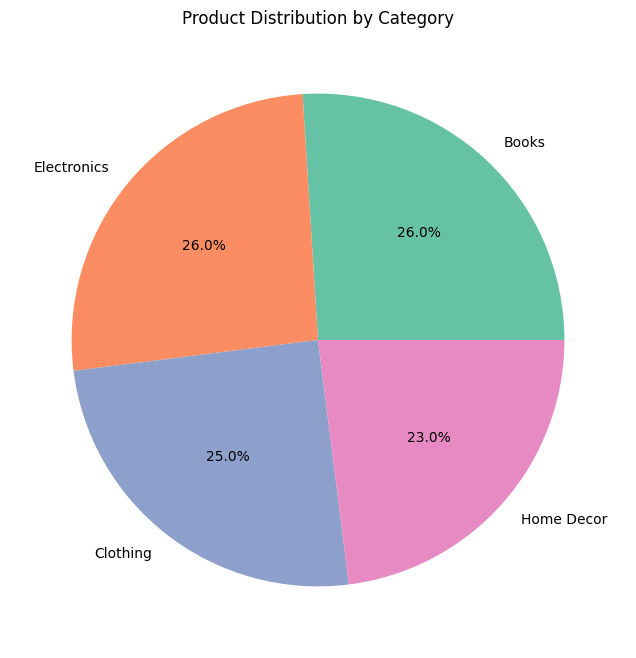

In [136]:
category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2', len(category_counts)))
plt.title('Product Distribution by Category')
plt.show()

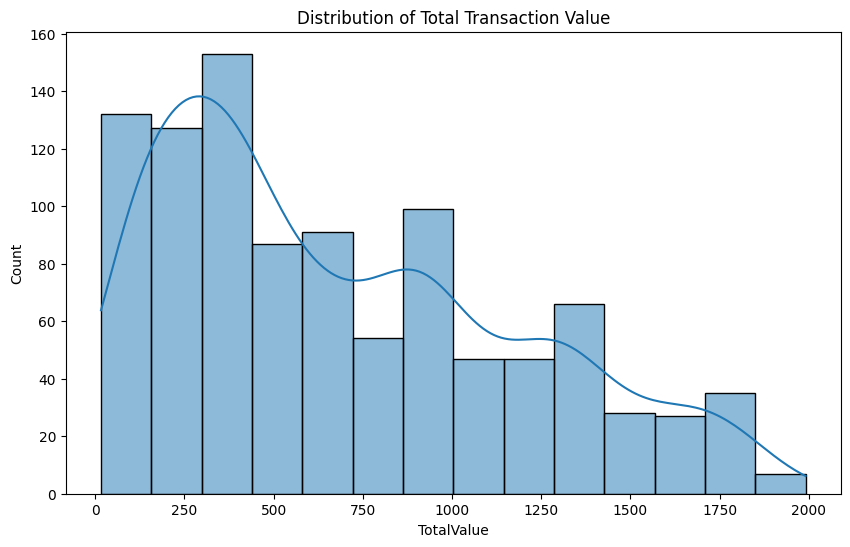

In [137]:
# . Distribution of Transaction Values
# Visualize the distribution of TotalValue to understand the spread and check for outliers.

plt.figure(figsize=(10, 6))
sns.histplot(df['TotalValue'], kde=True)
plt.title('Distribution of Total Transaction Value')
plt.show()

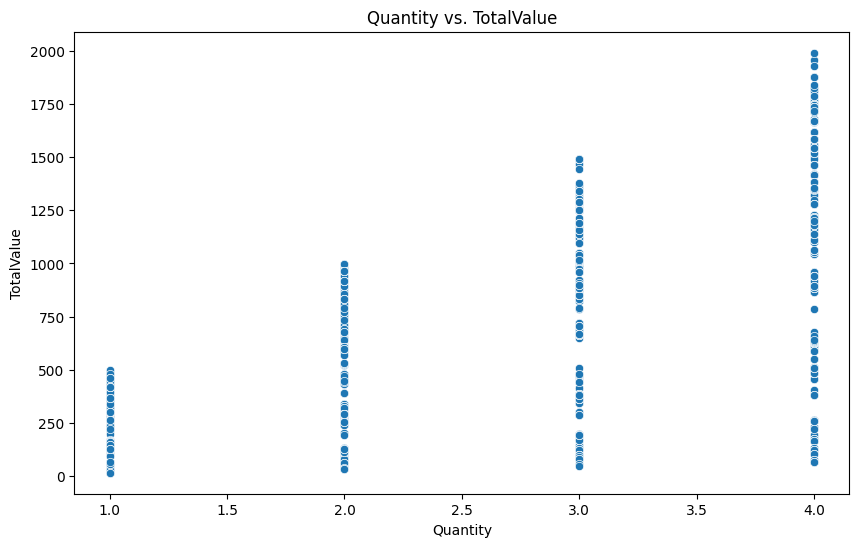

            Quantity  TotalValue
Quantity    1.000000    0.609972
TotalValue  0.609972    1.000000


In [67]:
# 4. Relationship Between Quantity and TotalValue
# Check the correlation between Quantity and TotalValue using a scatter plot.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='TotalValue', data=df)
plt.title('Quantity vs. TotalValue')
plt.show()

# Calculate correlation
print(df[['Quantity', 'TotalValue']].corr())

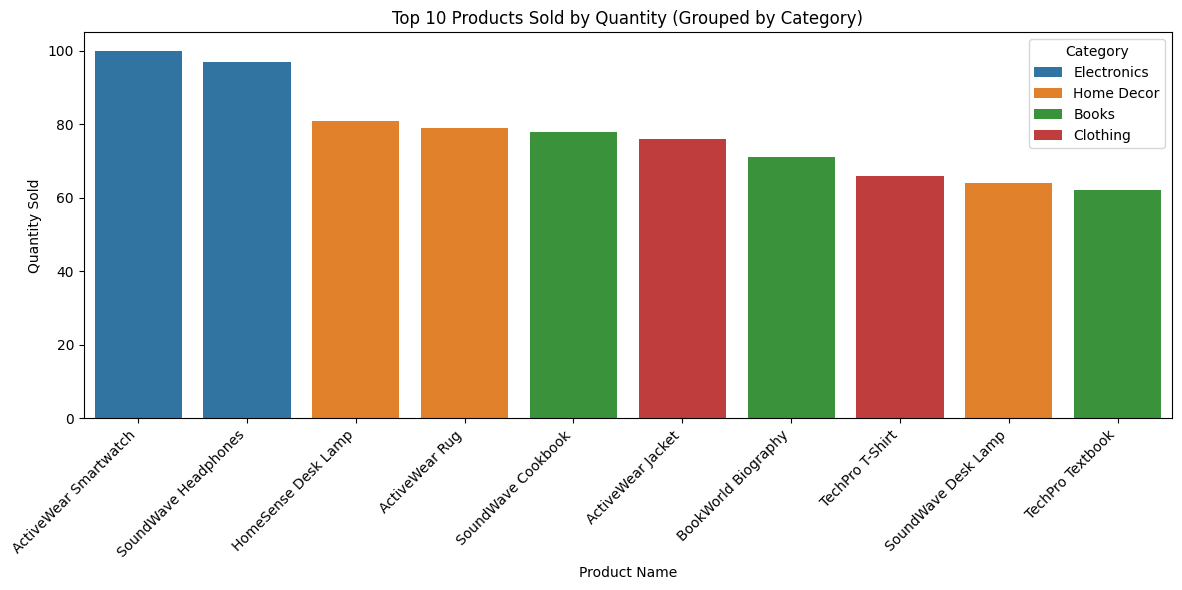

In [119]:
# Merge the transactions data (df) with the products data (df2) on ProductID
merged_df = pd.merge(transactions, products, on='ProductID', how='inner')

# Group the data by ProductName and Category, and sum the quantities sold, then sort by quantity sold
top_products = merged_df.groupby(['ProductName', 'Category'])['Quantity'].sum().sort_values(ascending=False).head(10)

# Reset the index to flatten the multi-index
top_products = top_products.reset_index()

# Visualize the top products by quantity sold, with the category in the label
plt.figure(figsize=(12, 6))
sns.barplot(x='ProductName', y='Quantity', data=top_products, hue='Category')
plt.title('Top 10 Products Sold by Quantity (Grouped by Category)')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


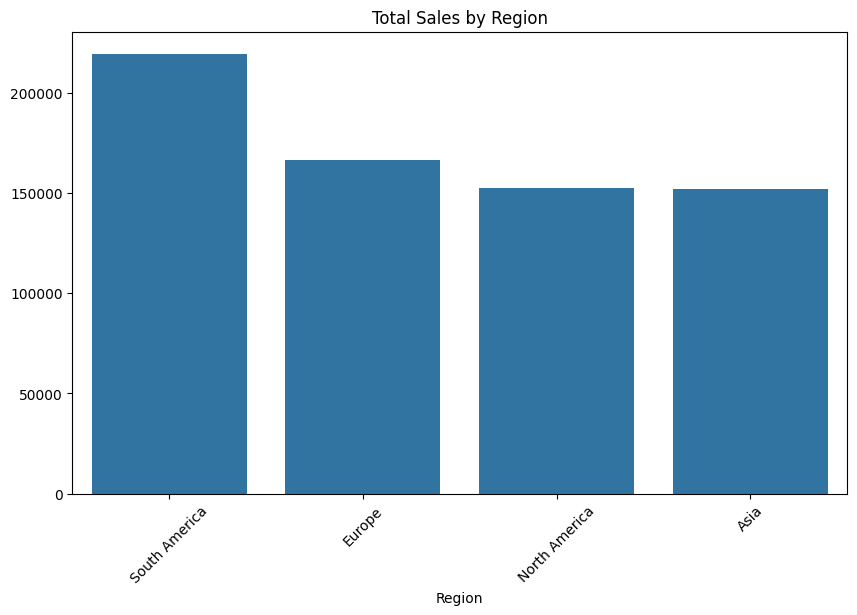

In [69]:
# Sales by Region
# Group by Region and calculate the total value of transactions per region. Visualize the results.

sales_by_region = df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(sales_by_region)

# Visualize the sales by region
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.title('Total Sales by Region')
plt.xticks(rotation=45)
plt.show()

CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


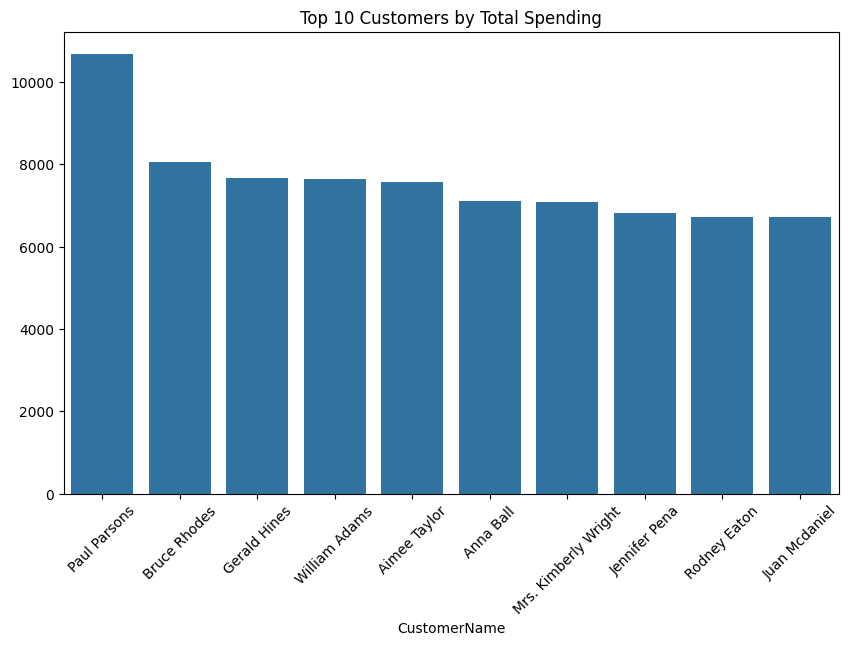

In [70]:
# 7. Customer Analysis
# Identify the top customers based on total spending.

top_customers = df.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(top_customers)

# Visualize the top customers by total spending
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title('Top 10 Customers by Total Spending')
plt.xticks(rotation=45)
plt.show()

YearMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


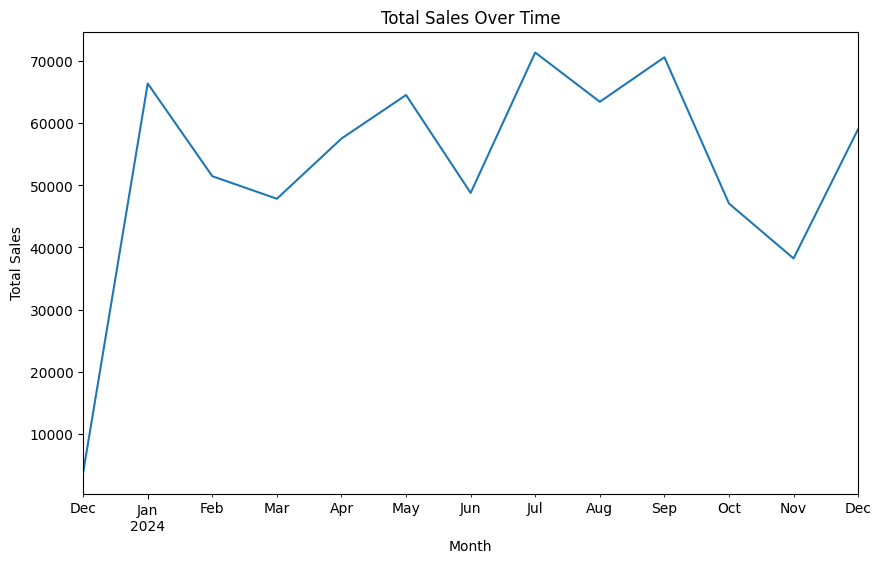

In [71]:
# 8. Time-based Analysis
# Analyze the sales trends over time by grouping the data by year/month.

df['YearMonth'] = df['TransactionDate'].dt.to_period('M')

monthly_sales = df.groupby('YearMonth')['TotalValue'].sum()
print(monthly_sales)

# Plot the sales over time
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

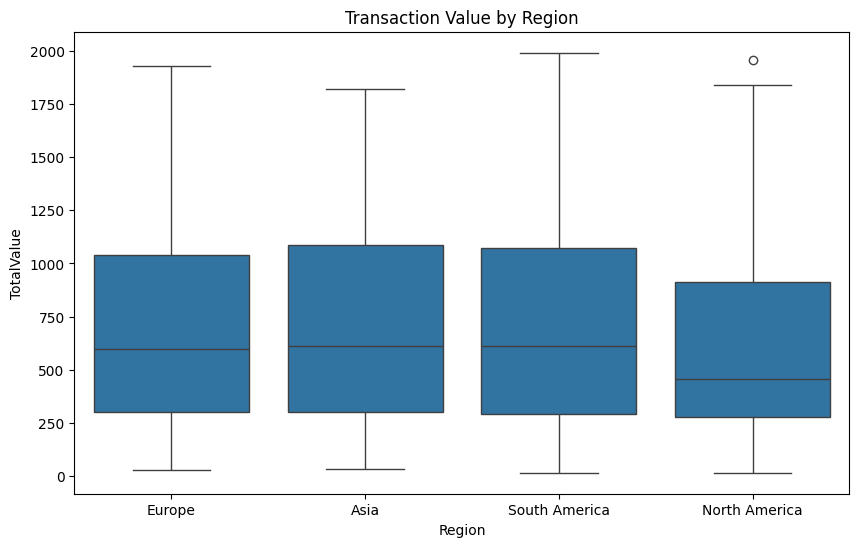

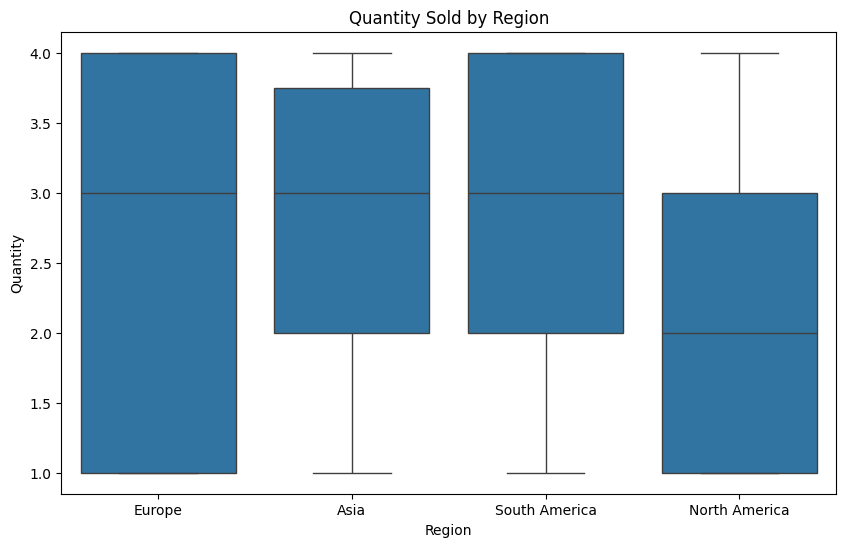

In [72]:
# 9. Identifying Outliers
# Use box plots to detect outliers in the Quantity and TotalValue columns by region.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='TotalValue', data=df)
plt.title('Transaction Value by Region')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Quantity', data=df)
plt.title('Quantity Sold by Region')
plt.show()

CustomerName
William Adams      11
Abigail Jones      11
Gerald Hines       10
Paul Parsons       10
David Li           10
Matthew Johnson    10
Nancy Walker        9
Juan Mcdaniel       9
Misty Higgins       9
Belinda Garner      9
Name: TransactionID, dtype: int64


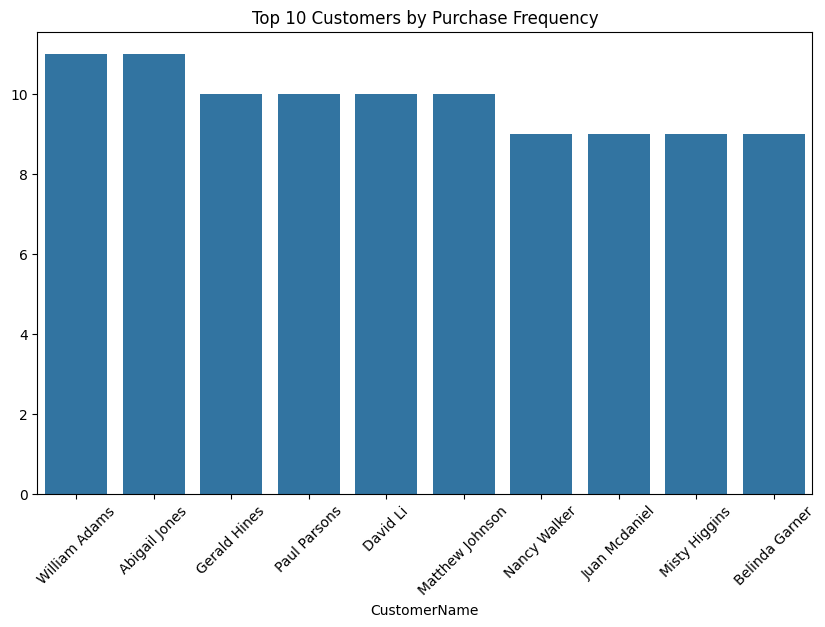

In [77]:
# 10. Customer Purchase Frequency
# Check how frequently customers make purchases by counting the number of transactions for each customer.

customer_freq = df.groupby('CustomerName')['TransactionID'].count().sort_values(ascending=False).head(10)
print(customer_freq)

# Visualize customer purchase frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_freq.index, y=customer_freq.values)
plt.title('Top 10 Customers by Purchase Frequency')
plt.xticks(rotation=45)
plt.show()

In [80]:
print(df.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'CustomerName', 'Region',
       'YearMonth'],
      dtype='object')


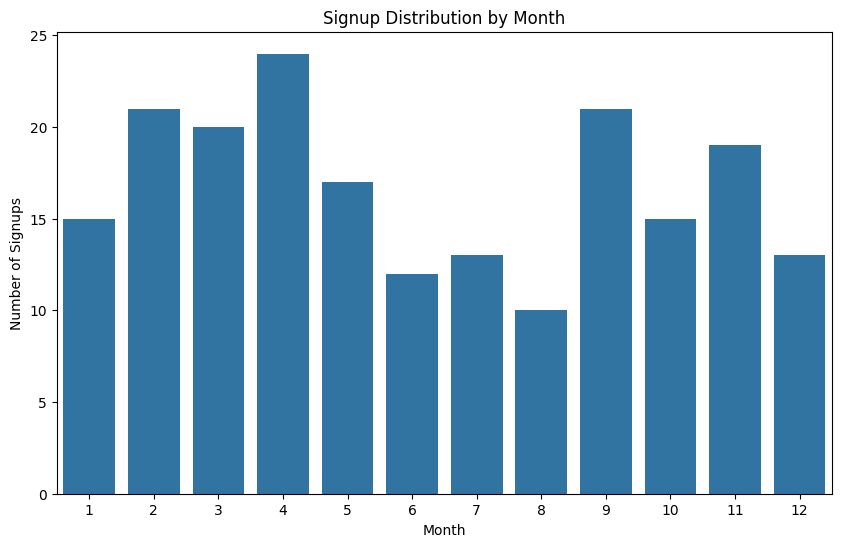

In [73]:
# Extract month from SignupDate
customers['SignupMonth'] = customers['SignupDate'].dt.month

# Plot the number of signups per month
plt.figure(figsize=(10, 6))
sns.countplot(x='SignupMonth', data=customers)
plt.title('Signup Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.show()


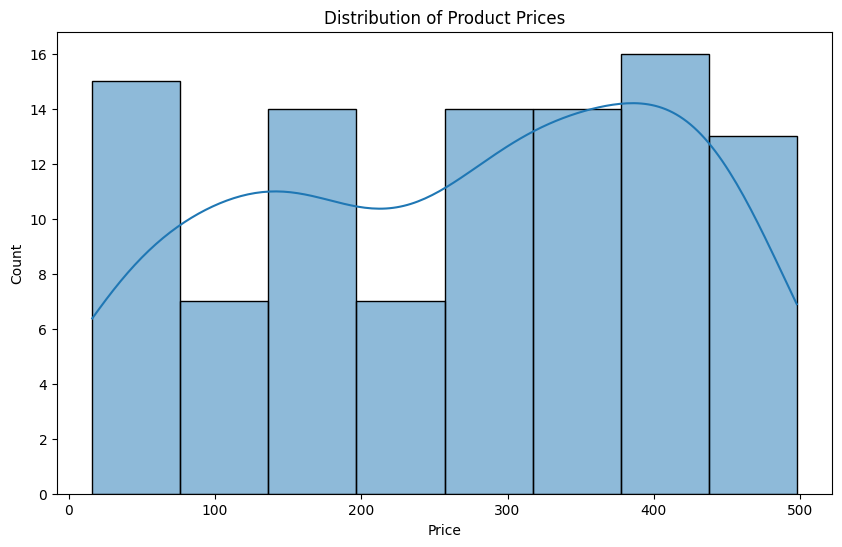

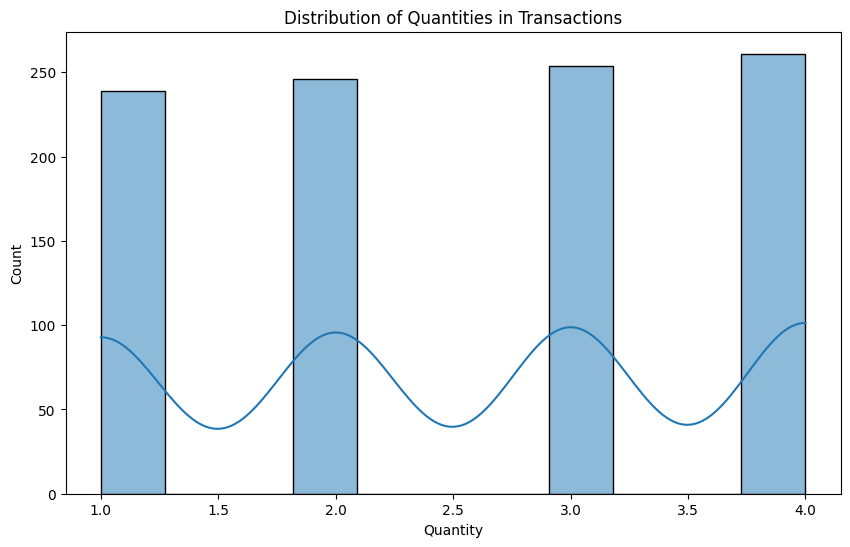

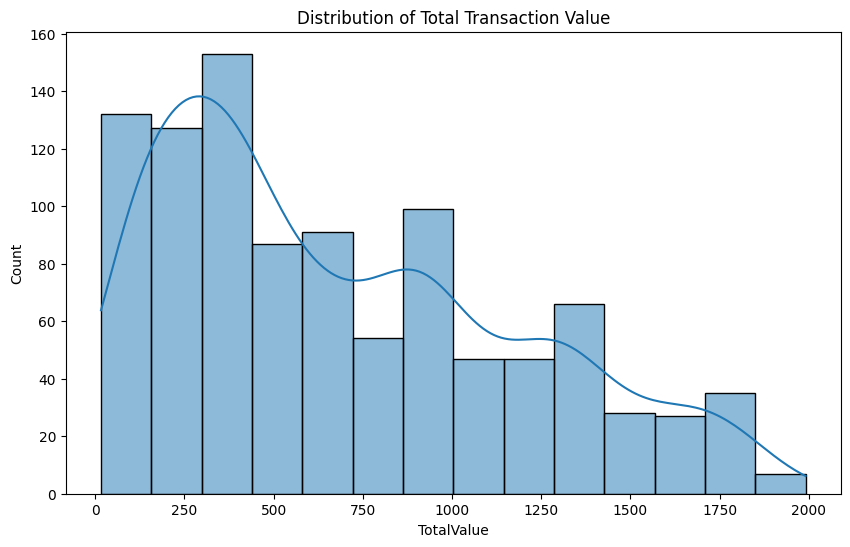

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Product Prices
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], kde=True)
plt.title('Distribution of Product Prices')
plt.show()

# Distribution of Quantity in Transactions
plt.figure(figsize=(10, 6))
sns.histplot(transactions['Quantity'], kde=True)
plt.title('Distribution of Quantities in Transactions')
plt.show()

# Distribution of TotalValue in Transactions
plt.figure(figsize=(10, 6))
sns.histplot(transactions['TotalValue'], kde=True)
plt.title('Distribution of Total Transaction Value')
plt.show()


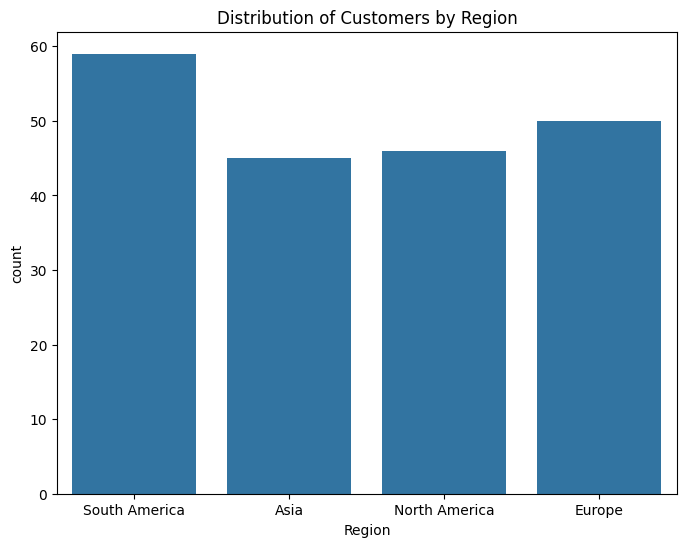

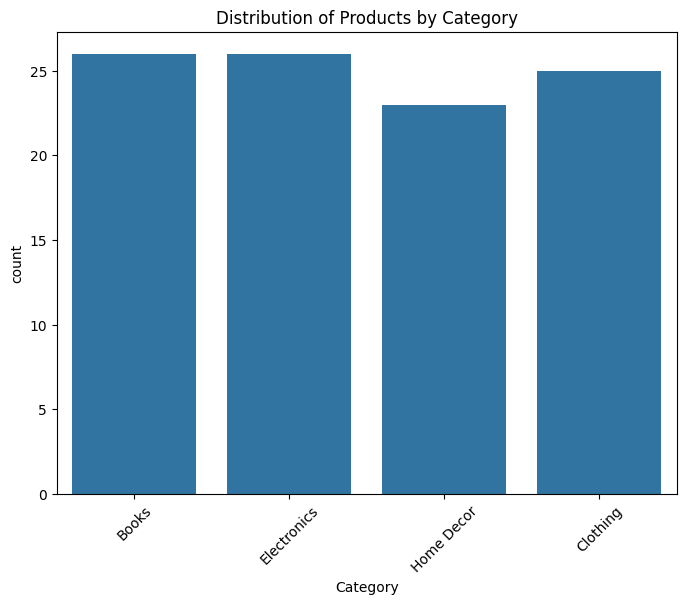

In [75]:
# Customer Region Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Region', data=customers)
plt.title('Distribution of Customers by Region')
plt.show()

# Product Category Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=products)
plt.title('Distribution of Products by Category')
plt.xticks(rotation=45)
plt.show()


# Bivariate Analysis

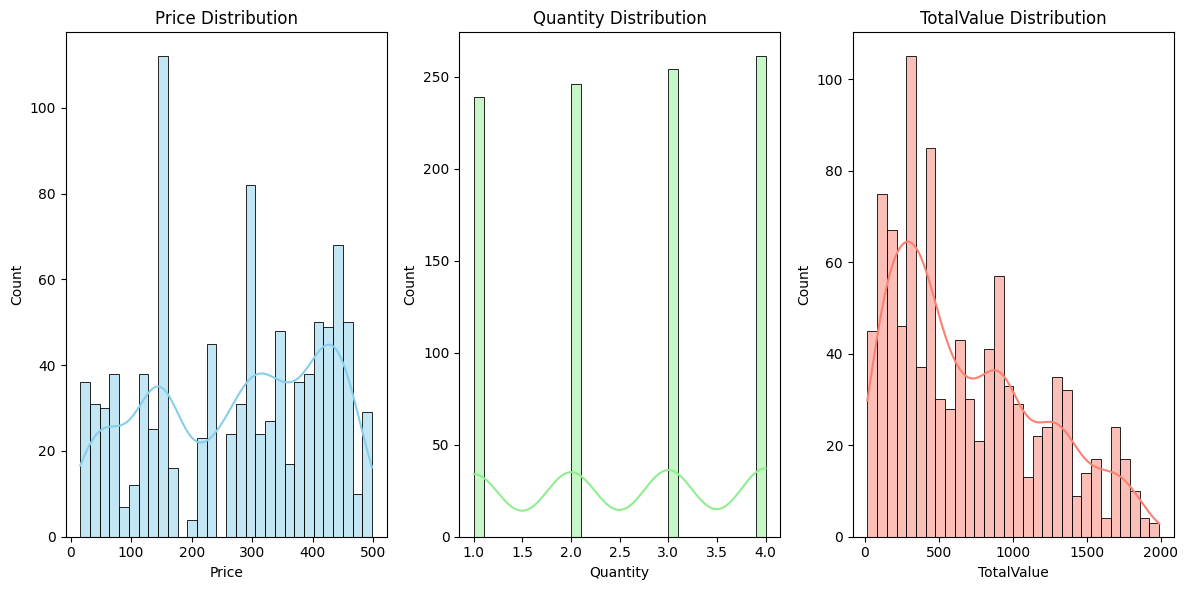

In [100]:
# Plot histograms and kernel density plots for Price, Quantity, TotalValue
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Price'], kde=True, color='skyblue', bins=30)
plt.title('Price Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Quantity'], kde=True, color='lightgreen', bins=30)
plt.title('Quantity Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['TotalValue'], kde=True, color='salmon', bins=30)
plt.title('TotalValue Distribution')

plt.tight_layout()
plt.show()


# Bivariate Analysis

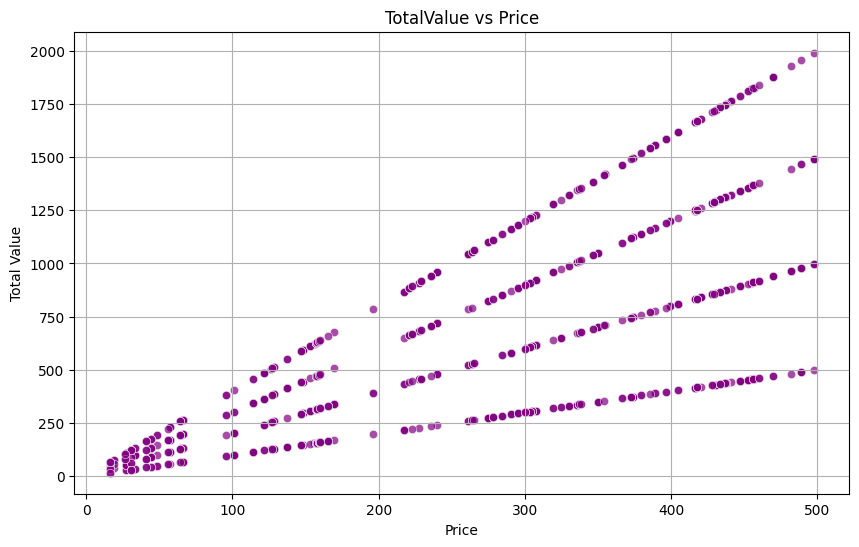

Correlation between Price and TotalValue: 0.72


In [102]:
# Scatter Plot for TotalValue vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='TotalValue', data=df, color='purple', alpha=0.7)
plt.title('TotalValue vs Price')
plt.xlabel('Price')
plt.ylabel('Total Value')
plt.grid(True)
plt.show()

# Correlation between Price and TotalValue
correlation = df['Price'].corr(df['TotalValue'])
print(f"Correlation between Price and TotalValue: {correlation:.2f}")


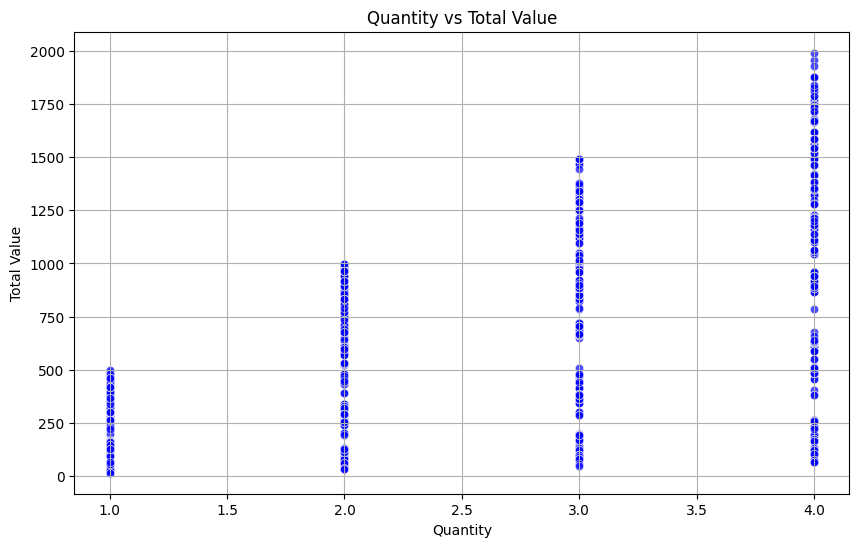

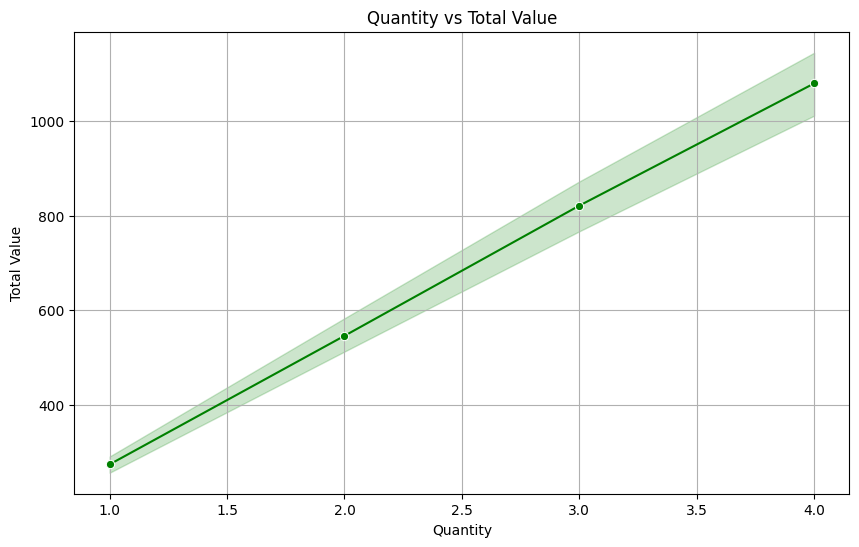

In [103]:
# Quantity vs TotalValue (Scatter Plot and Line Plot)
# Objective: Visualize if higher quantities correlate with higher total values.

# Scatter Plot for Quantity vs TotalValue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='TotalValue', data=df, color='blue', alpha=0.7)
plt.title('Quantity vs Total Value')
plt.xlabel('Quantity')
plt.ylabel('Total Value')
plt.grid(True)
plt.show()

# Line Plot for Quantity vs TotalValue
plt.figure(figsize=(10, 6))
sns.lineplot(x='Quantity', y='TotalValue', data=df, color='green', marker='o')
plt.title('Quantity vs Total Value')
plt.xlabel('Quantity')
plt.ylabel('Total Value')
plt.grid(True)
plt.show()

C:\Users\vikas\AppData\Local\Temp\ipykernel_21484\1266414131.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='TotalValue', data=df, palette='Set2')


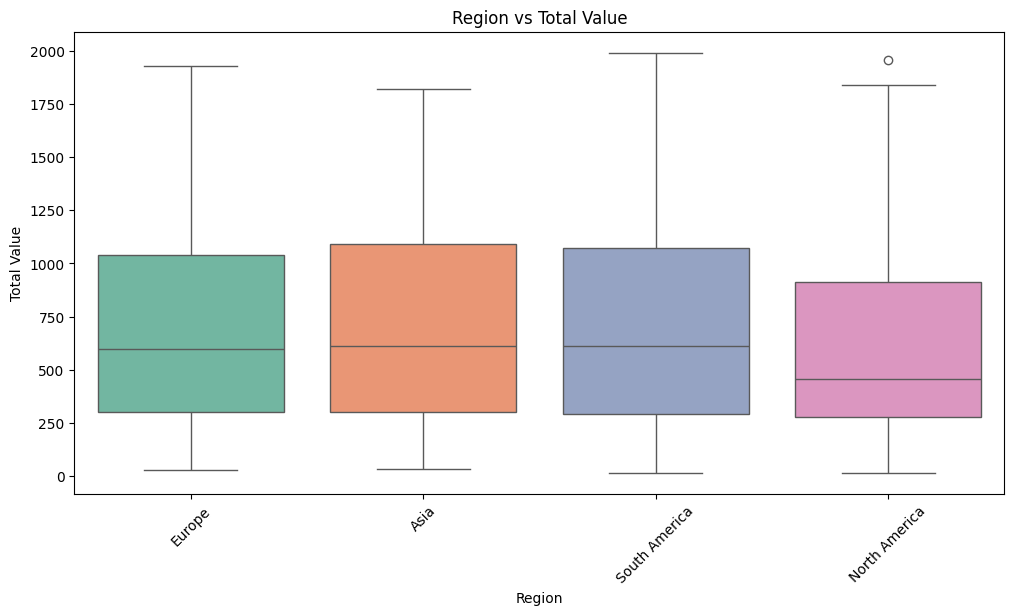

C:\Users\vikas\AppData\Local\Temp\ipykernel_21484\1266414131.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Quantity', data=df, palette='Set2')


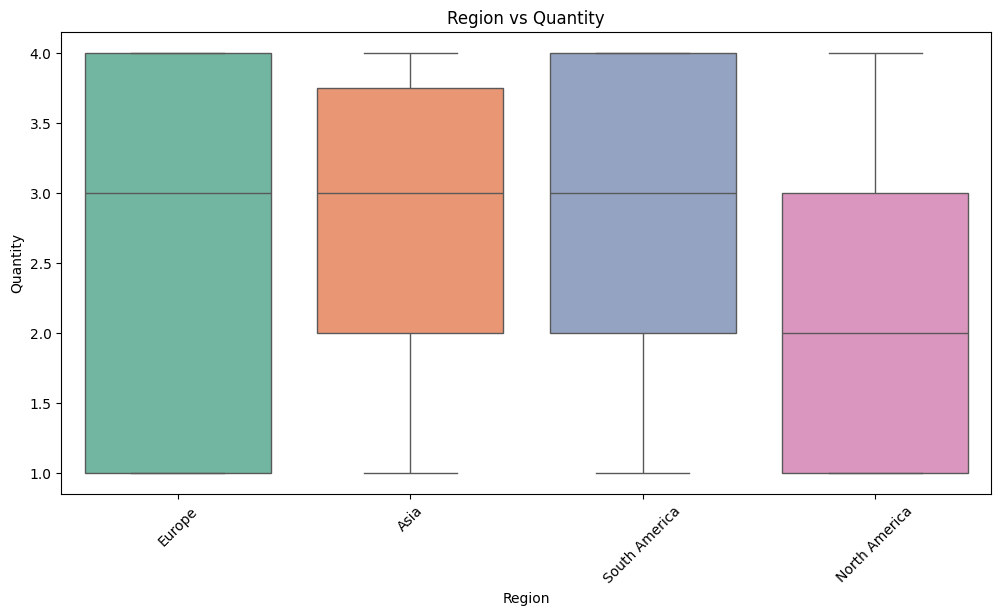

In [104]:
# 3. Region vs TotalValue or Quantity (Box Plot)
# Objective: Visualize how transaction value or quantity varies across different regions to identify top-performing regions.

# Box Plot for Region vs TotalValue
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='TotalValue', data=df, palette='Set2')
plt.title('Region vs Total Value')
plt.xlabel('Region')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.show()

# Box Plot for Region vs Quantity
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Quantity', data=df, palette='Set2')
plt.title('Region vs Quantity')
plt.xlabel('Region')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()


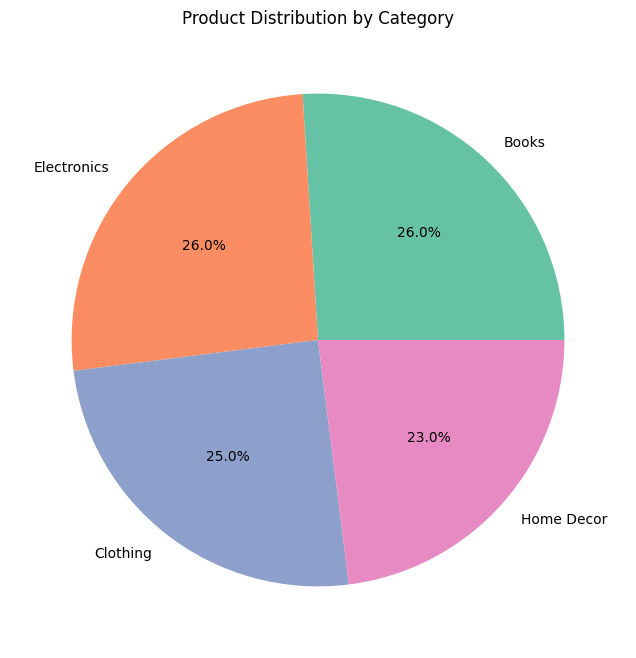

In [113]:
category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2', len(category_counts)))
plt.title('Product Distribution by Category')
plt.show()